In [1]:
# House Prices

What is regression neural Network?


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv("./data/train.csv")
df.head()
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
X = df[num_cols]
y = df['SalePrice']

X = X.dropna()
y = y.loc[X.index]

#normalize fatures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) #single output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train,y_train, epochs=100, batch_size=16, validation_split=0.1)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36432687104.0000 - mae: 176882.3125 - val_loss: 40345116672.0000 - val_mae: 185592.7188
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 39641280512.0000 - mae: 182291.0625 - val_loss: 40337289216.0000 - val_mae: 185575.0938
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 39835348992.0000 - mae: 182838.0312 - val_loss: 40312258560.0000 - val_mae: 185519.7812
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 36707655680.0000 - mae: 176949.0781 - val_loss: 40253714432.0000 - val_mae: 185391.9375
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 37917298688.0000 - mae: 179239.2344 - val_loss: 40146763776.0000 - val_mae: 185158.9062
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 40730648576.0000 - mae: 184157.8594 - val_loss: 39977234432.0000 - val_mae: 184788.5312
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 38202511360.0000 - mae: 179858.5312 - val_loss:

In [19]:
loass, mae = model.evaluate(X_test,y_test)
print(f"Test MAE: ${mae: .2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3022666496.0000 - mae: 41631.2617
Test MAE: $ 41989.33


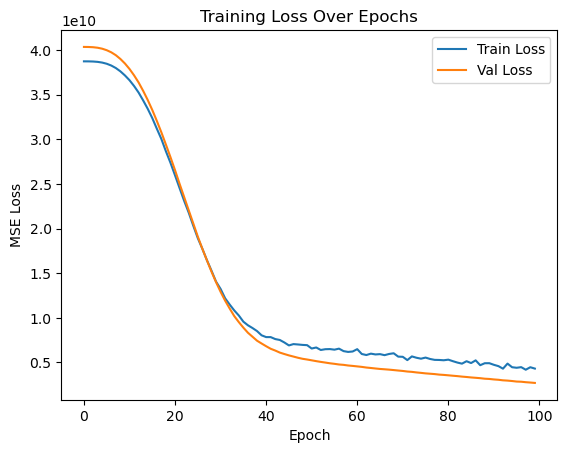

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Loss Over Epochs")
plt.show()

# Inference

In [27]:
# Example input from dataset

sample = np.array([[7, 1710, 2, 548, 856, 856, 2, 2003]]) #feature order matters

# $scale uning same scaler
sample_scaled = scaler.transform(sample)

# $predict
predicted_price = model.predict(sample_scaled)
print(f"Predicted Sale Price: ${predicted_price[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Sale Price: $167,903.02


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
